# QUIMB bosonic results plot

In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Load data

In [3]:
with open(r'data/bosonic_results/ed_b_params.pkl', 'rb') as f:
    ed_b_params = pickle.load(f)

In [4]:
with open(r'data/bosonic_variational_unitary_circuits_ed/overlaps.pkl', 'rb') as f:
    ed_overlaps = pickle.load(f)

In [8]:
with open(r'data/bosonic_variational_unitary_circuits_ed/mean_proj_rep_angle.pkl', 'rb') as f:
    ed_mean_gauge_invariant_proj_rep_angle = pickle.load(f)
with open(r'data/bosonic_variational_unitary_circuits_ed/error_proj_rep_angle.pkl', 'rb') as f:
    ed_error_gauge_invariant_proj_rep_angle = pickle.load(f)

In [6]:
with open(r'data/bosonic_results/b_params.pkl', 'rb') as f:
    mps_b_params = pickle.load(f)

In [7]:
with open(r'data/bosonic_variational_unitary_circuits/overlaps.pkl', 'rb') as f:
    mps_overlaps = pickle.load(f)

In [9]:
with open(r'data/bosonic_variational_unitary_circuits/mean_proj_rep_angle.pkl', 'rb') as f:
    mps_mean_gauge_invariant_proj_rep_angle = pickle.load(f)
with open(r'data/bosonic_variational_unitary_circuits/error_proj_rep_angle.pkl', 'rb') as f:
    mps_error_gauge_invariant_proj_rep_angle = pickle.load(f)

# Plot

In [10]:
colors = [
    'tab:blue',
    'tab:orange',
    'tab:green'
]

symmetry_labels = [
    'II',
    'IX',
    'XI',
    'XX'
]

In [11]:
mps_overlaps

array([[0.9968155 , 0.9984365 , 0.99928963],
       [0.9968135 , 0.9958008 , 0.99309266],
       [0.9891706 , 0.9883427 , 0.9789066 ],
       [0.97360194, 0.9729388 , 0.9522804 ],
       [0.95553213, 0.95680374, 0.91403615],
       [0.9258779 , 0.92936146, 0.86172193],
       [0.8922737 , 0.89413285, 0.79595184],
       [0.844232  , 0.8441255 , 0.71348816],
       [0.775642  , 0.7747415 , 0.59894896],
       [0.6660738 , 0.6673077 , 0.44598353],
       [0.66226566, 0.6595839 , 0.44468892],
       [0.737508  , 0.74737585, 0.5604097 ],
       [0.8000149 , 0.7853259 , 0.64094657],
       [0.818952  , 0.8062053 , 0.70002   ],
       [0.8473199 , 0.8223148 , 0.7447562 ],
       [0.8747305 , 0.8612709 , 0.7804592 ],
       [0.8817972 , 0.86260515, 0.8086084 ],
       [0.8986656 , 0.8913467 , 0.83063924],
       [0.87813723, 0.91432154, 0.8493537 ],
       [0.9019251 , 0.8822399 , 0.86551785]], dtype=float32)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


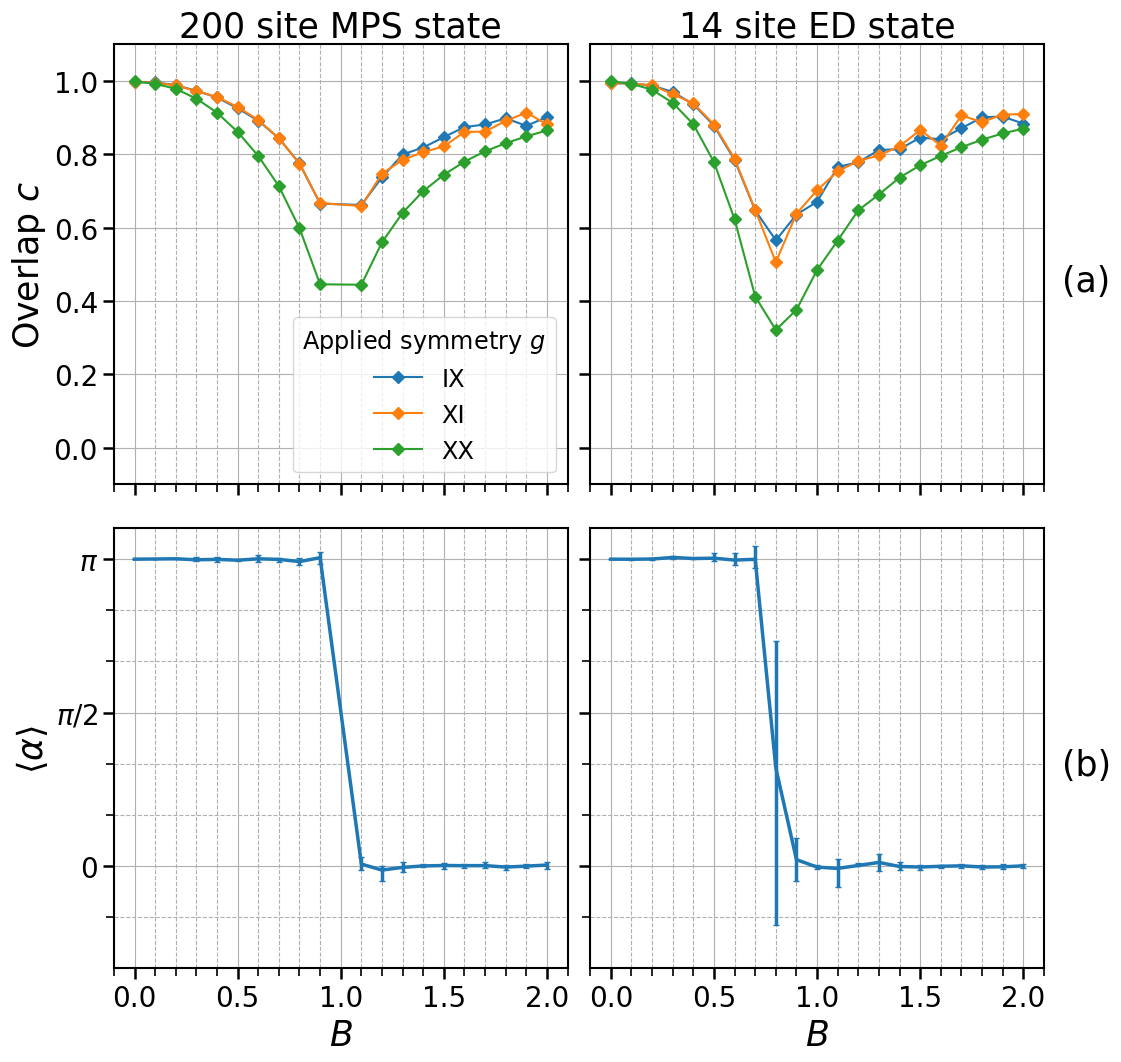

In [29]:
figure_label_fontsize=25
y_tick_label_fontsize=20
y_label_fontsize=25
x_tick_label_fontsize=20
x_label_fontsize=25
row_label_fontsize=25

axis_spine_linewidth = 1.5

major_tick_length = 8
major_tick_width = 1.8
minor_tick_length = 6
minor_tick_width = 1.2

phase_linewidth = 2.5

fig, ax_grid = plt.subplots(figsize=(12, 12), ncols=2, nrows=2)

for j, (col, label) in enumerate(zip(colors, symmetry_labels[1:])):
    ax_grid[0][0].plot(
        mps_b_params,
        mps_overlaps[:, j],
        color=col,
        label=label,
        marker='D'
    )

    ax_grid[0][1].plot(
        ed_b_params,
        ed_overlaps[:, j],
        color=col,
        label=label,
        marker='D'
    )

ax_grid[1][0].errorbar(
    mps_b_params,
    mps_mean_gauge_invariant_proj_rep_angle,
    yerr=mps_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)

ax_grid[1][1].errorbar(
    ed_b_params,
    ed_mean_gauge_invariant_proj_rep_angle,
    yerr=ed_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)


ax_grid[0][0].set_ylim(-0.1, 1.1)
ax_grid[0][1].set_ylim(-0.1, 1.1)
ax_grid[1][0].set_ylim(-np.pi/3, np.pi*(1.1))
ax_grid[1][1].set_ylim(-np.pi/3, np.pi*(1.1))


for i, ax_row in enumerate(ax_grid):
    for j, ax in enumerate(ax_row):
        ax.xaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(0.5)
        )
        ax.xaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(0.1)
        )

        #ax.grid()

        ax.grid(
            which='major',
            axis='both',
            zorder=-1e10
        )
        
        ax.grid(
            which='minor',
            axis='both',
            linestyle='--',
            zorder=-1e10
        )

        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(axis_spine_linewidth)

        ax.tick_params(
            axis='both',
            which='major',
            length=major_tick_length,
            width=major_tick_width
        )

        ax.tick_params(
            axis='both',
            which='minor',
            length=minor_tick_length,
            width=minor_tick_width
        )

        if i == 0:
            if j == 0:
                ax.title.set_text(rf'200 site MPS state')
            elif j == 1:
                ax.title.set_text(rf'14 site ED state')
            ax.title.set_fontsize(figure_label_fontsize)
    
            ax.yaxis.set_major_locator(
                matplotlib.ticker.MultipleLocator(0.2)
            )

        if i == 1:
            ax.set_yticks(
                np.linspace(0, np.pi, 3),
                labels=['$0$', '$\pi/2$', '$\pi$']
            )
            
            ax.set_yticks(
                [-np.pi/6, np.pi/6, np.pi/3, 2*np.pi/3, 5*np.pi/6],
                minor=True
            )

            ax.set_xlabel('$B$', fontsize=x_label_fontsize)

            ax.tick_params(
                axis='x',
                which='major',
                labelsize=x_tick_label_fontsize
            )
        """
            ax.grid(
                which='minor',
                axis='y',
                linestyle='--',
                zorder=-1e10
            )
        """
        if j == 0:
            ax.tick_params(
                axis='y',
                which='major',
                labelsize=y_tick_label_fontsize
            )

        if j == 1:
            ax.set_yticklabels([])
            ax.yaxis.set_label_position("right")
        if i!= 1:
            ax.set_xticklabels([])

ax_grid[0][0].set_ylabel(r'Overlap $c$', fontsize=y_label_fontsize)
ax_grid[1][0].set_ylabel(r'$\langle \alpha \rangle$', fontsize=y_label_fontsize)

for i, l in enumerate('ab'):
    ax_grid[i][1].set_ylabel(
        f'({l})',
        fontsize=row_label_fontsize,
        rotation='horizontal',
        ha='left',
        labelpad=13
    )

ax_grid[0][0].legend(
    loc='lower right',
    title='Applied symmetry $g$',
    fontsize='xx-large',
    title_fontsize='xx-large'
)

fig.subplots_adjust(wspace=0.05, hspace=0.1)

fig.savefig(
    r'plots/variational_circuit_bosonic_results.png',
    dpi=200,
    bbox_inches='tight'
)